<a href="https://colab.research.google.com/github/akki96/Machine_learning-samples/blob/master/CNNEx1_CatsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source:https://www.kaggle.com/c/dogs-vs-cats/data

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-05-14 11:25:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   171MB/s    in 0.4s    

2020-05-14 11:25:34 (171 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
#extract files from zip to /tmp
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
#create necessary directories to split data
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

# train directories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# test directories
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [0]:
#Check data shape
print('Training (Cat) :', len(os.listdir(train_cats_dir ) ))
print('Training (Dog) :', len(os.listdir(train_dogs_dir ) ))

print('Testing (Cat) :', len(os.listdir(test_cats_dir ) ))
print('Testing (Dog) :', len(os.listdir(test_dogs_dir ) ))
#Expected ouput
#1000
#1000
#500
#500

Training (Cat) : 1000
Training (Dog) : 1000
Testing (Cat) : 500
Testing (Dog) : 500


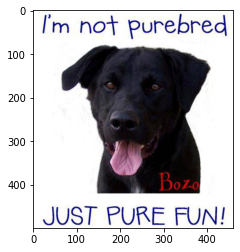

In [0]:
#See the cats and dogs
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#img_path=os.path.join(train_cats_dir, 'cat.400.jpg')
img_path=os.path.join(train_dogs_dir, 'dog.900.jpg')
img = mpimg.imread(img_path)
plt.imshow(img)

In [0]:
#Generate the data on the fly
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# reshape the image
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

#batch_size = 20 and target_size = 150x150
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
#define the model
import tensorflow as tf
model = tf.keras.models.Sequential([
    #Conv2D adds a convulation layer, 16: number of filters(https://lodev.org/cgtutor/filtering.html), (3,3) convolution 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #images are 150x150 RGB(3)
    tf.keras.layers.MaxPooling2D(2,2),                    #MaxPooling2D will reduce the dimension
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), #another conv layer with 32 filters
    tf.keras.layers.MaxPooling2D(2,2),                    #another pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #another conv layer with 64 filters 
    tf.keras.layers.MaxPooling2D(2,2),                    #anotehr pooling layers
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(512, activation='relu'),        #512 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')        #0 for cats and 1 for dogs (Binary classifier)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
#compile with RMSprop: RMS = Root Mean Squared
from tensorflow.keras.optimizers import RMSprop 

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
#Fit the model with 15 epochs
history = model.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=300,
                              epochs=20,
                              validation_steps=6,
                              verbose=2)

Epoch 1/20
300/300 - 22s - loss: 0.1441 - accuracy: 0.9540 - val_loss: 0.9246 - val_accuracy: 0.7667
Epoch 2/20
300/300 - 22s - loss: 0.1405 - accuracy: 0.9528 - val_loss: 0.5288 - val_accuracy: 0.7833
Epoch 3/20
300/300 - 24s - loss: 0.1526 - accuracy: 0.9518 - val_loss: 0.7285 - val_accuracy: 0.8167
Epoch 4/20
300/300 - 22s - loss: 0.1414 - accuracy: 0.9567 - val_loss: 0.6884 - val_accuracy: 0.7833
Epoch 5/20
300/300 - 22s - loss: 0.1361 - accuracy: 0.9552 - val_loss: 1.7956 - val_accuracy: 0.7167
Epoch 6/20
300/300 - 22s - loss: 0.1291 - accuracy: 0.9558 - val_loss: 1.0675 - val_accuracy: 0.8083
Epoch 7/20
300/300 - 22s - loss: 0.1346 - accuracy: 0.9545 - val_loss: 1.2849 - val_accuracy: 0.7750
Epoch 8/20
300/300 - 23s - loss: 0.1484 - accuracy: 0.9520 - val_loss: 1.2869 - val_accuracy: 0.7000
Epoch 9/20
300/300 - 22s - loss: 0.1328 - accuracy: 0.9558 - val_loss: 0.6968 - val_accuracy: 0.7917
Epoch 10/20
300/300 - 22s - loss: 0.1352 - accuracy: 0.9505 - val_loss: 1.3966 - val_accura

In [0]:
#Let's test with random images
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn       #Save the image to content folder
  img=image.load_img(path, target_size=(150, 150))    #load the image
  
  x=image.img_to_array(img)    
  x=np.expand_dims(x, axis=0)   
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)    #predict the label for the image
  
  print(classes[0])     #Print the label, remember it will be either one or zero
  
  if classes[0]>0:
    print(fn + " is a dog")     #print human readable label
    
  else:
    print(fn + " is a cat")     #print human readable label 

Saving download.jpg to download.jpg
[1.]
download.jpg is a dog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


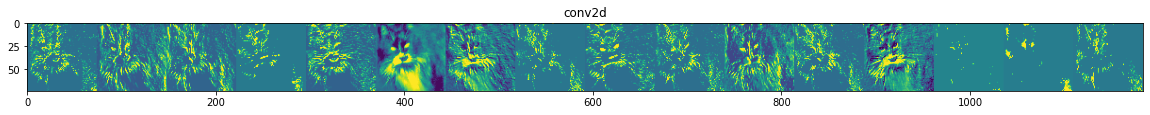

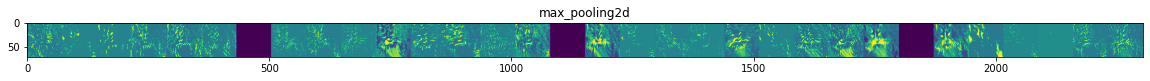

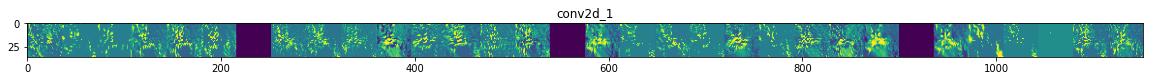

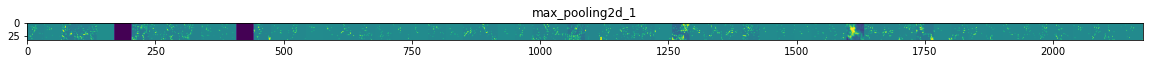

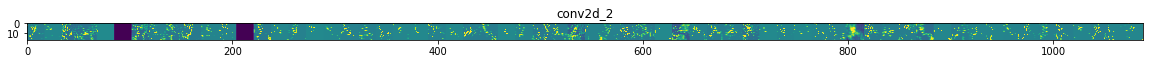

In [0]:
#The internal process
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img


successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in ['cat.0.jpg','cat.10.jpg','cat.25.jpg','cat.40.jpg'
                                                            ,'cat.100.jpg']]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in ['dog.0.jpg','dog.10.jpg','dog.25.jpg','dog.40.jpg'
                                                            ,'dog.100.jpg']]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  

x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)                  

x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1] 
    size       = feature_map.shape[ 1]  
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 